In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
df=pd.read_csv('C:/Users/ANKIT PC/Desktop/learning intrvention(classification)/beers (1).csv')
df.head()

,Brand,Brewery,PercentAlcohol,Calories,Carbohydrates
0,Anchor Steam,Anchor,4.9,153,16.0
1,Anheuser Busch Natural Light,Anheuser Busch,4.2,95,3.2
2,Anheuser Busch Natural Ice,Anheuser Busch,5.9,157,8.9
3,Aspen Edge,Adolph Coors,4.1,94,2.6
4,Blatz Beer,Pabst,4.8,153,12.5


In [36]:
df.shape

(86, 5)

In [37]:
df=df.iloc[:,2:5]

In [38]:
from scipy.stats import zscore
from sklearn.cluster import KMeans

df_scaled=df.apply(zscore)
df_scaled.head()

,PercentAlcohol,Calories,Carbohydrates
0,0.188118,0.432217,1.172831
1,-0.747806,-1.667001,-1.870669
2,1.525152,0.576990,-0.515360
3,-0.881510,-1.703195,-2.013333
4,0.054414,0.432217,0.340624


### we need to find optimal k and  scree plot

In [39]:
cluster_range=range(1,15)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=10) ##10times 1 cluster,10 times the 2 cluster and so on.
    clusters.fit(df_scaled) ##take that clusters on scaled dataset
    labels=clusters.labels_ ## k values
    centroids= clusters.cluster_centers_ ##within that hat is centriod
    cluster_errors.append(clusters.inertia_) ##within cluster sum f squares
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:15]    ##calaculating errors. by default eudidian distance

,num_clusters,cluster_errors
0,1,258.000000
1,2,121.377419
2,3,88.235176
3,4,59.077160
4,5,39.788677
5,6,32.321725
6,7,28.354018
7,8,23.631485
8,9,19.747241
9,10,17.167151


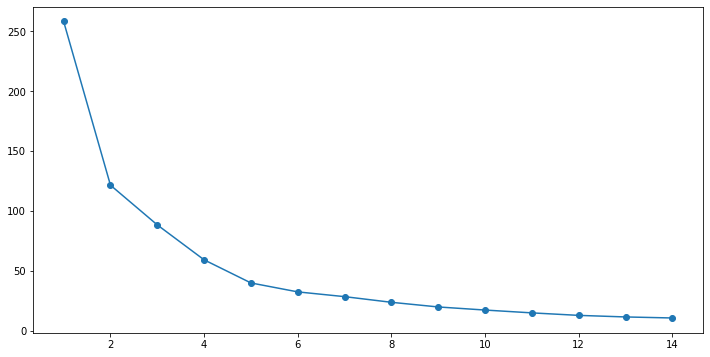

In [40]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.show()

In [41]:
K_mean=KMeans(n_clusters=2,n_init=15,random_state=123)
K_mean.fit(df_scaled)
centroids=K_mean.cluster_centers_
centroids

array([[ 0.37573374,  0.51452749,  0.45720999],
       [-0.97064549, -1.329196  , -1.18112582]])

In [42]:
K_mean.labels_

df_labels=pd.DataFrame(K_mean.labels_,columns=list(['labels']))
df_labels['labels']=df_labels['labels'].astype('category')

In [43]:
df_labeled=df.join(df_labels)
df_labeled.head()

,PercentAlcohol,Calories,Carbohydrates,labels
0,4.9,153,16.0,0
1,4.2,95,3.2,1
2,5.9,157,8.9,0
3,4.1,94,2.6,1
4,4.8,153,12.5,0


In [44]:
##displaying cluster for 0 
df_labeled[df_labeled.labels==0]

,PercentAlcohol,Calories,Carbohydrates,labels
0,4.9,153,16.0,0
2,5.9,157,8.9,0
4,4.8,153,12.5,0
5,5.4,171,13.7,0
6,5.0,130,7.8,0
7,5.5,148,8.9,0
10,5.0,145,10.6,0
12,4.6,133,10.2,0
13,5.9,169,12.5,0
15,4.3,138,12.5,0


In [45]:

df_labeled[df_labeled.labels==1]

,PercentAlcohol,Calories,Carbohydrates,labels
1,4.2,95,3.2,1
3,4.1,94,2.6,1
8,4.1,110,6.5,1
9,4.2,110,6.6,1
11,4.3,99,3.1,1
14,4.2,110,6.7,1
18,4.2,102,5.0,1
27,4.1,110,7.3,1
28,4.4,108,5.0,1
29,4.2,104,5.1,1


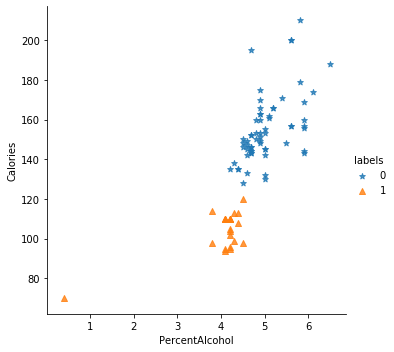

In [46]:
markers=['*','^']
sns.lmplot('PercentAlcohol','Calories',data=df_labeled,hue='labels',fit_reg=False,markers=markers)
plt.show()

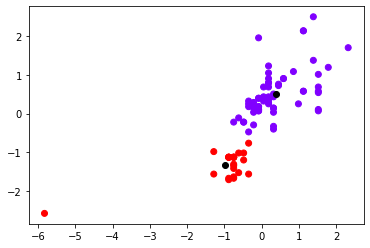

In [62]:
plt.scatter(df_scaled['PercentAlcohol'],df_scaled['Calories'],c=df_labeled['labels'].astype(float),cmap='rainbow')
plt.scatter(centroids[:,0],centroids[:,1],c='black',cmap='rainbow')